In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import load_digits
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = load_digits()
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=15)
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

0% concluído...
0% concluído...
10% concluído...
20% concluído...
30% concluído...
40% concluído...
50% concluído...
60% concluído...
70% concluído...
80% concluído...
90% concluído...


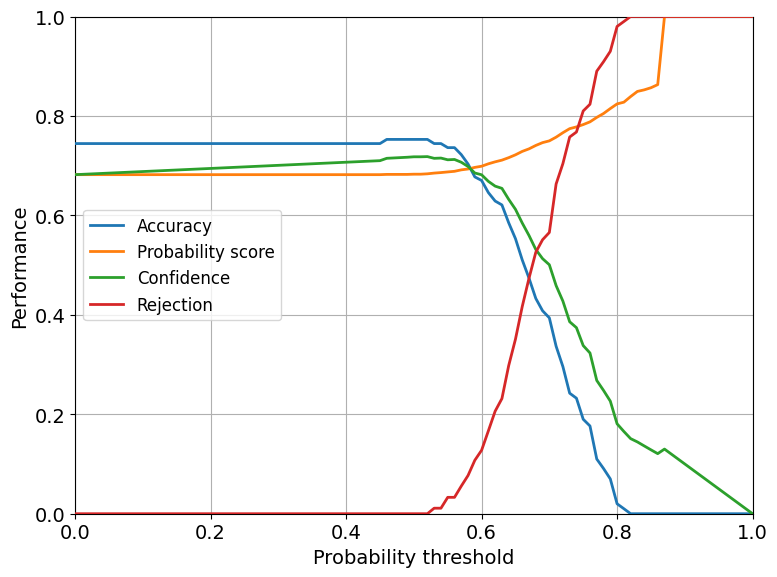


Best probability threshold value: 0.52
accuracy 0.752809
prob_score 0.683615
rejection 0.0
confidence 0.718212


In [4]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = np.append(np.arange(0, 1, 0.01), 0.999)
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        45
           1       0.40      0.80      0.53        46
           2       0.74      0.71      0.73        45
           3       0.82      0.61      0.70        46
           4       0.79      0.91      0.85        46
           5       0.70      0.67      0.69        46
           6       0.91      0.63      0.74        46
           7       0.67      0.84      0.75        45
           8       0.72      0.64      0.67        44
           9       0.47      0.67      0.55        45
     Unknown       0.97      0.83      0.90       227

    accuracy                           0.75       681
   macro avg       0.74      0.72      0.71       681
weighted avg       0.80      0.75      0.76       681


Confusion matrix:


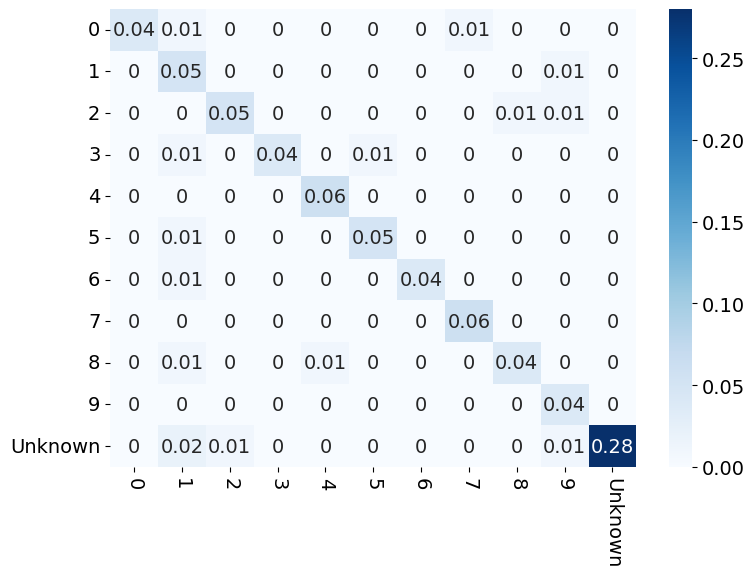


Index and Target label:
Index: 0 Label: 0
Index: 1 Label: 1
Index: 2 Label: 2
Index: 3 Label: 3
Index: 4 Label: 4
Index: 5 Label: 5
Index: 6 Label: 6
Index: 7 Label: 7
Index: 8 Label: 8
Index: 9 Label: 9

Probability score threshold: 0.52
accuracy 0.833333
prob_score 0.698857
rejection 0.311111
confidence 0.766095


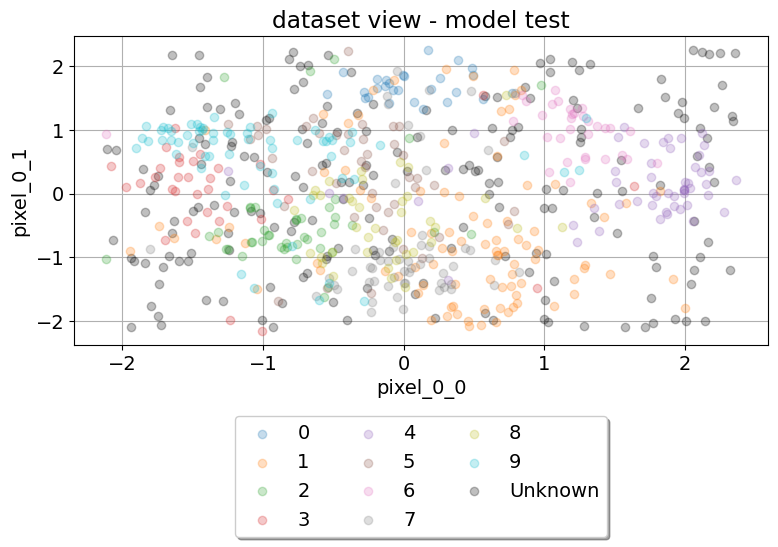

In [5]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'], target_names=ds_model['target_names'])
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)